# Filtracja - na czym ona polega i do czego służy?
Opracowanie: A.Florkowska
\
Repozytorium: https://github.com/aflorkowska/Image-Processing/tree/main

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

Image shape: (450, 280)
Image type: float64
Minimum value 0.0 and maximum value 1.0


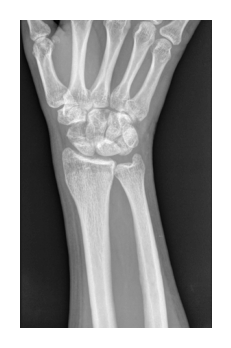

In [2]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread(".././images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Filtracja
Filtracja jest jedną z metod przetwarzania obrazów w celu osiągnięcia jakiegoś konkretnego celu np. wydobycie uzytecznych informacji (wykrycia krawędzi), czy też usunięcie niepożądanych informacji (rozmycia obrazu, usunięcia szumów). Jedną z podstawowych metod filtracji jest tzw. liniowa filtracja kontekstowa obrazu, która do wyznaczenia jednego punktu obrazu wynikowego korzysta z przeprowadzenia operacji matematycznej na kilku punktach (z obrazu wejściowego) z najbliższego otoczenia. Operacja filtrowania bazuje na operacji splot (konwolucji). Każdy filtr różni się od siebie maską, a konkretnie jej wagami (wartościami, współczynnikami). 

To co należy pamiętać podczas definiowania sygnałów - operacja konwolucji obraca maskę o 180 stopni. Patrząc tylko algorytmicznie, pomiając znaczenie matematyczne, można zastosować operację konwolucji na obróconej wcześniej masce (żeby operacja obracania maski wewnątrz operacji konwolucji nic nie zmieniła) lub zastosować finalną maskę, korzystając z operacji korelacji.  

Filtry można podzielić ze względu:
- wg pełnionej funkcji: wydobywanie informacji z obrazu lub redukowanie lokalnych zróżnicowań w intensywnosci (= wg pasma przepuszczania - o tym w kolejnym notatniku)
- wg liniowości czyli sposobie przetwarzania sąsiadujacych pikseli: liniowe (wynikowa wartość to kombinacja liniowa, użyta operacja konwolucji np. filtr medianowy, uśredniający, Gaussowski) i nieliniowe (to nie jest kombinacja liniowa, nie może być zrealizowana przez konwolucje np. filtr medianowy)
- wg istnienia uprzywilejowanych kierunków działania: izotropowe (działają równomiernie w każdym kierunku np. filtr Gaussa), anizotropowe (są bardziej adaptacyjne, działają z różną siłą lub w różnych kierunkach np. filtr Sobela, Prewitta)

# Filtracja eksponująca detale i zmienność na obrazie
Służy do eksponowania elementów takich jak krawędzie (szybkie zmiany intensywności), narożniki, pojedyncze punkty. Wykorzystywane są do tego pierwsze i drugie pochodne intensywności obrazu. Do najpopularniejszych operatorów zaliczane są:
- operator gradientu (omówiony w poprzednim notatniku)
- operator Sobela
  * pozwala na eksponowanie lini o różnych orientacjach poprzez możliwość obrotu maski w różnych kierunkach (o 90 i 45 stopni)
  * widoczny wzmocniony wpływ najbliższego otoczenia piksela
  * jego zaletą jest jednoczesne różnicowanie (wykrywanie krawędzi) i wygładzanie (zmniejszenie szumu)
- operator Prewitta
  * w zależności od obrotu maski, pozwala na eskponowanie poziomych bądź pionowych lini
  * w porównaniu do operatora Sobela, nie kładzie aż tak nacisku na sąsiadujące piksele 
- laplasjany
  * podkreślają krawędzie i kontury obiektów niezależnie od tego, pod jakim kątem one przebiegają (w przeciwieństwie do operatora Sobela czy Prewitta, wykorzystuje tylko jedno jądro)
  * niesie informacje, czy krawędź zmienia się z jaśniejszej na ciemniejszą, lub odwrotnie
  * bazują na drugiej pochodnej
  * słabo radzą sobie z szumami (aby to naprawić, przed zastosowaniem laplasjanu obraz jest często wygładzany filtrem Gaussa)
  * suma wag maski jest równa 0, dzięki czemu w obszarach o stałej wartości pikseli (obszary jednorodne) przekształcenie generuje odpowiedź zerową


In [3]:
def sobel_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  return gradient_y, gradient_x

def sobel_gradient_conv(image):
  window_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.convolve2d(image, window_x)
  gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x
    
def prewitt_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  return gradient_y, gradient_x

def prewitt_gradient_conv(image):
  window_x = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.convolve2d(image, window_x)
  gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

def laplacian(image):
  # window = np.array([
  #   [0, -1, 0],
  #   [-1, 4, -1],
  #   [0, -1, 0]                     
  # ])
  window = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]                     
  ])
  laplacian_image = signal.convolve2d(image, window)
  return laplacian_image

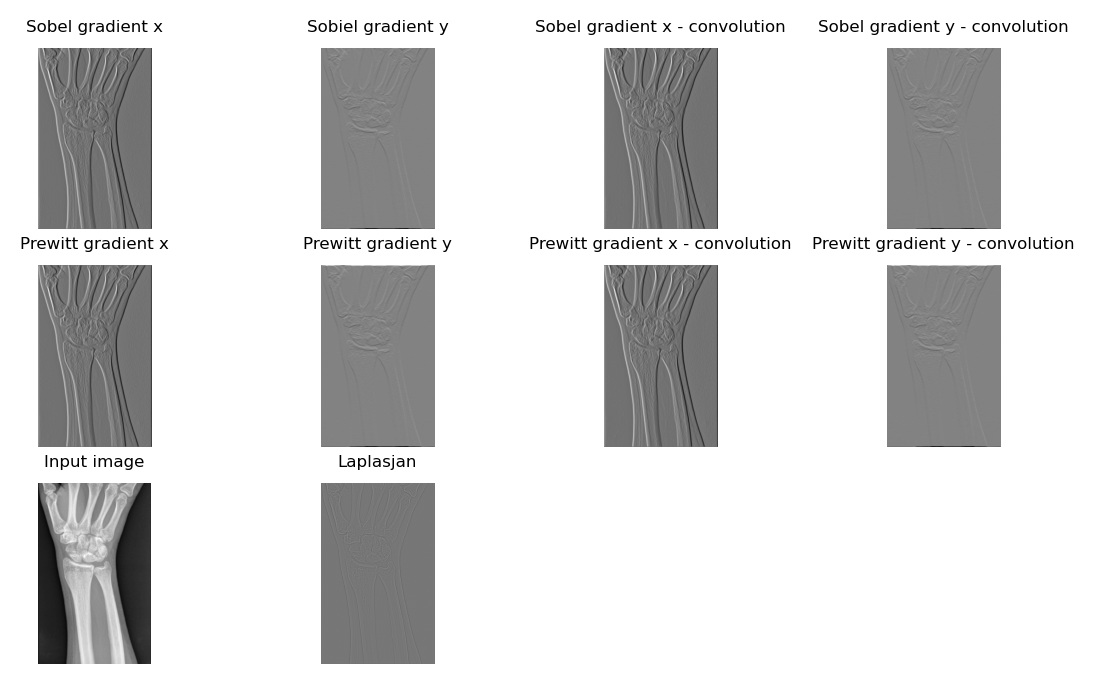

In [4]:
sobel_gradient_y, sobel_gradient_x = sobel_gradient(image)
sobel_conv_gradient_y, sobel_conv_gradient_x = sobel_gradient_conv(image)
prewitt_gradient_y, prewitt_gradient_x = prewitt_gradient(image)
prewitt_conv_gradient_y, prewitt_conv_gradient_x = prewitt_gradient_conv(image)
laplacian_image = laplacian(image)

plt.figure(figsize=(7, 4), dpi=200)
plt.subplot(3, 4, 1)
plt.imshow(sobel_gradient_x, cmap='gray')
plt.title("Sobel gradient x", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 2)
plt.imshow(sobel_gradient_y, cmap='gray')
plt.title("Sobiel gradient y", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 3)
plt.imshow(sobel_conv_gradient_x, cmap='gray')
plt.title("Sobel gradient x - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 4)
plt.imshow(sobel_conv_gradient_y, cmap='gray')
plt.title("Sobel gradient y - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 5)
plt.imshow(prewitt_gradient_x, cmap='gray')
plt.title("Prewitt gradient x", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 6)
plt.imshow(prewitt_gradient_y, cmap='gray')
plt.title("Prewitt gradient y", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 7)
plt.imshow(prewitt_conv_gradient_x, cmap='gray')
plt.title("Prewitt gradient x - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 8)
plt.imshow(prewitt_conv_gradient_y, cmap='gray')
plt.title("Prewitt gradient y - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 9)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 4, 10)
plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplasjan", fontsize=6)
plt.axis('off')
plt.show()

# Filtracja wygładzająca
Służy do redukcji lokalnego zróżnicowania obiektów np. rozmycia krawędzi, generalizacji obiektu, czy zaweżenia zakresu intensywności. Do najpopularniejszych filtrów zaliczane są:

- filtr równomierny
  * równomierna filtracja w każdym otaczającym pikselu
- filtr uśredniający
  * usuwa drobne zakłócenia z obrazu przy jednoczesnym rozmyciu konturów obiektów i pogorszeniu rozpoznawalności ich kształtu
- filtr medianowy
  * zaletą jest, że nie wprowadzamy żadnych wartości, współczynników - bazowanie na operacji mediany
  * filtr nieliniowy
  * obraz po filtracji pozostaje ostry, co nie jest pożądane (= usuwanie szumów przy minimalnej utracie jakości obrazu lub całkowicie bez strat)
  * filtracja jest wolniejsza niż filtrem Gaussa, czy równomiernym
  * stosowany do usuwania zakłóceń typu 'pieprz i sól'
- filtr Gaussa
  * powoduje efekt rozmycia obrazu
  * największenie znaczenie ma piksel centralny = największa waga

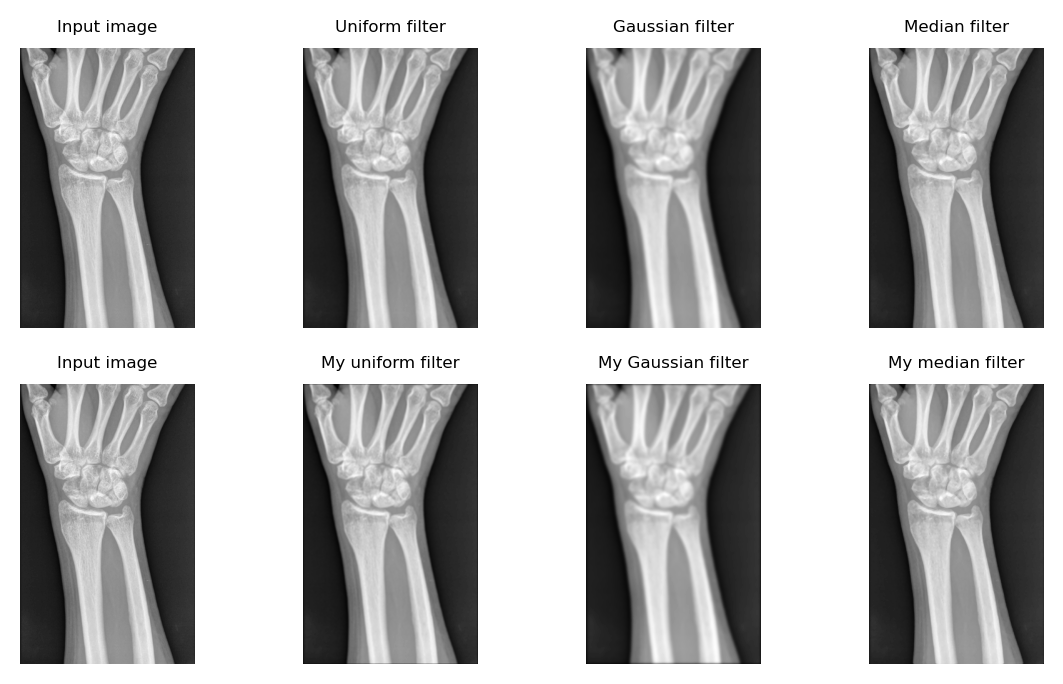

In [8]:
def uniform_filter(image, filter_size):
  return nd.uniform_filter(image, filter_size)
 
def gaussian_filter(image, sigma):
  return nd.gaussian_filter(image, sigma)

def median_filter(image, filter_size):
  return nd.median_filter(image, filter_size)
    
def calculate_padding_size(kernelSize) -> int:
    if kernelSize==1:
      return 1
    else:
      return int(kernelSize / 2)
        
def my_median_filter(image, kernelXsize, kernelYsize):
    padXsize = calculate_padding_size(kernelXsize) 
    padYsize = calculate_padding_size(kernelYsize) 
    padded_matrix = np.pad(image, ((padYsize, padYsize), (padXsize, padXsize)), mode='constant')
    final_image = np.zeros_like(image)
    
    for y in range (padYsize,image.shape[0] + padYsize):
        for x in range (padXsize,image.shape[1] + padXsize):
            final_image[y - padYsize, x -padXsize] = np.median(padded_matrix[y - padYsize : y + padYsize + 1,x - padXsize : x + padXsize + 1])
    return final_image 

def my_uniform_filter(image, kernelXsize, kernelYsize):
    padXsize = calculate_padding_size(kernelXsize) 
    padYsize = calculate_padding_size(kernelYsize) 
    padded_matrix = np.pad(image, ((padYsize, padYsize), (padXsize, padXsize)), mode='constant')
    final_image = np.zeros_like(image)
    
    for y in range (padYsize,image.shape[0] + padYsize):
        for x in range (padXsize,image.shape[1] + padXsize):
            final_image[y - padYsize, x -padXsize] = np.mean(padded_matrix[y - padYsize : y + padYsize + 1,x - padXsize : x + padXsize + 1])
    return final_image 

def my_gaussian_filter(image, sigma=3):
    def calculate_gaussian_mask(sigma):
      filter_size = 2 * int(4 * sigma + 0.5) + 1
      gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
      
      m = filter_size//2
      n = filter_size//2
        
      for x in range(-m, m+1):
        for y in range(-n, n+1):
          x1 = 2*np.pi*(sigma**2)
          x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
          gaussian_filter[x+m, y+n] = (1/x1)*x2 
      return gaussian_filter 
    
    mask = calculate_gaussian_mask(sigma)
    padXsize = calculate_padding_size(mask.shape[1]) 
    padYsize = calculate_padding_size(mask.shape[0]) 
    padded_matrix = np.pad(image, ((padYsize, padYsize), (padXsize, padXsize)), mode='constant')
    final_image = np.zeros_like(image)
    for y in range (padYsize,image.shape[0] + padYsize):
        for x in range (padXsize,image.shape[1] + padXsize):
            final_image[y - padYsize, x -padXsize] = np.sum(np.multiply(padded_matrix[y - padYsize : y + padYsize + 1,x - padXsize : x + padXsize + 1], mask))
    return final_image

uniformFilterSize = 3
medianFilterSize = 3
gaussianSigma = 2 

uniform_filtered = uniform_filter(image, uniformFilterSize)
gaussian_filtered = gaussian_filter(image, gaussianSigma)
median_filtered = median_filter(image, 3)

uniform_filtered_myVersion = my_uniform_filter(image, uniformFilterSize, uniformFilterSize)
gaussian_filtered_myVersion = my_gaussian_filter(image, gaussianSigma)
median_filtered_myVersion = my_median_filter(image, uniformFilterSize, uniformFilterSize)

plt.figure(figsize=(7, 4), dpi=200)
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(uniform_filtered, cmap='gray')
plt.title("Uniform filter", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian filter", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median filter", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(uniform_filtered_myVersion, cmap='gray')
plt.title("My uniform filter", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(gaussian_filtered_myVersion, cmap='gray')
plt.title("My Gaussian filter", fontsize=6)
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(median_filtered_myVersion, cmap='gray')
plt.title("My median filter", fontsize=6)
plt.axis('off')
plt.show()

# Filtracja statyczna
Po zastosowaniu tych filtrów, wartość wynikowa nie jest sumą ważoną poszczególnych pikseli, lecz wybraną wartością odpowiedniego piksela pod maską

- filtr medianowy - wybierana jest mediana, czyli wartość środkowa, filtr omówiony wcześniej
- filtr minimalny - wybierana jest wartość najmniejsza. Nazywany też filtrem kompresującym lub erozyjnym. Filtr powoduje zmniejszenie jasności obrazu dając efekt erozji obiektów.
- filtr maksymalny - wybierana jest wartość największa. Nazywany też filtrem dekompresującym lub ekspansywnym. Powoduje zwiększenie jasności obrazu dająć efekt powiększania się obiektów.

(-0.5, 279.5, 449.5, -0.5)

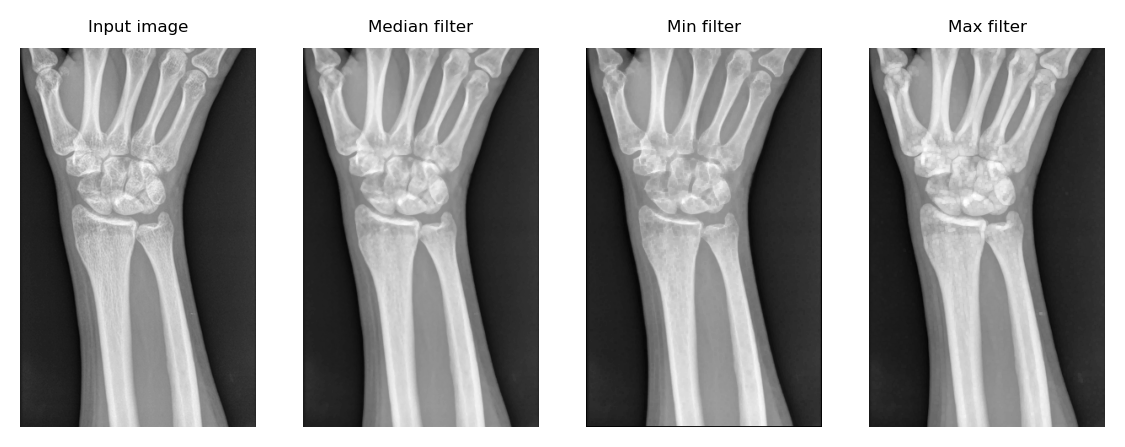

In [7]:
def my_min_filter(image, kernelXsize, kernelYsize):
    padXsize = calculate_padding_size(kernelXsize) 
    padYsize = calculate_padding_size(kernelYsize) 
    padded_matrix = np.pad(image, ((padYsize, padYsize), (padXsize, padXsize)), mode='constant')
    final_image = np.zeros_like(image)
    
    for y in range (padYsize,image.shape[0] + padYsize):
        for x in range (padXsize,image.shape[1] + padXsize):
            final_image[y - padYsize, x -padXsize] = np.min(padded_matrix[y - padYsize : y + padYsize + 1,x - padXsize : x + padXsize + 1])
    return final_image 

def my_max_filter(image, kernelXsize, kernelYsize):
    padXsize = calculate_padding_size(kernelXsize) 
    padYsize = calculate_padding_size(kernelYsize) 
    padded_matrix = np.pad(image, ((padYsize, padYsize), (padXsize, padXsize)), mode='constant')
    final_image = np.zeros_like(image)
    
    for y in range (padYsize,image.shape[0] + padYsize):
        for x in range (padXsize,image.shape[1] + padXsize):
            final_image[y - padYsize, x -padXsize] = np.max(padded_matrix[y - padYsize : y + padYsize + 1,x - padXsize : x + padXsize + 1])
    return final_image 

min_filtered = my_min_filter(image,3,3)
max_filtered = my_max_filter(image,3,3)

plt.figure(figsize=(7, 4), dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median filter", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(min_filtered, cmap='gray')
plt.title("Min filter", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(max_filtered, cmap='gray')
plt.title("Max filter", fontsize=6)
plt.axis('off')

# Źródła
- https://kcir.pwr.edu.pl/~mucha/PProg/PProg_lab_03/filtrsplot.pdf
- https://home.agh.edu.pl/~dwornik/2023_IAD_Obrazy/AiPOC_03_filtracja.pdf